In [214]:
%matplotlib inline

import importlib
import math

import matplotlib.pyplot as plt
import numpy as np

import metropolis_ising
importlib.reload(metropolis_ising)

ising = metropolis_ising.MetropolisIsing(lattice_size_L = 4, 
                                                   bond_energy_J = 1, 
                                                   temperature_T = 3,
                                                   initial_temperature = "lo", 
                                                   sweeps = 10000)
plt.imshow(ising.lattice, interpolation="nearest")
plt.show()

SyntaxError: invalid syntax (metropolis_ising.py, line 216)

In [26]:
ising.metropolis()
magnet_history = ising.magnet_history
energy_history = ising.energy_history

Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


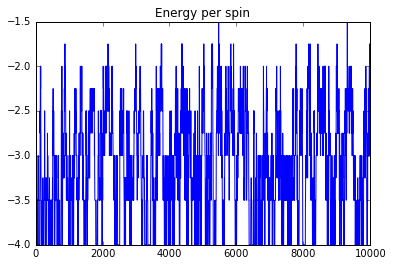

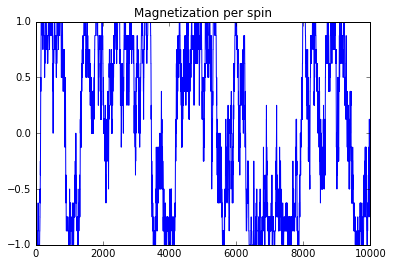

In [27]:
plt.title("Energy per spin")
cutoff = 25000
plt.plot(np.linspace(0, len(energy_history[:cutoff]), len(energy_history[:cutoff])), energy_history[:cutoff] / ising.no_of_sites)
plt.show()

plt.title("Magnetization per spin")
cutoff = 25000
plt.plot(np.linspace(0, len(magnet_history[:cutoff]), len(magnet_history[:cutoff])), magnet_history[:cutoff] / ising.no_of_sites)
plt.show()

In [21]:
# Data gets normalized immediatly.
equilibrium = 2000
equilibrium_energy = energy_history[equilibrium:] / ising.no_of_sites
equilibrium_magnet = magnet_history[equilibrium:] / ising.no_of_sites

8000
0.454926795898
0.010664506504
numpy_standard deviation 0.674482613489
4000
0.452683631836
0.0150446607113
numpy_standard deviation 0.672817680977
2000
0.448878456055
0.0211867518996
numpy_standard deviation 0.669983922236
1000
0.441761512695
0.0297241152163
numpy_standard deviation 0.664651421946
500
0.42989212793
0.0414676803272
numpy_standard deviation 0.655661595589
250
0.407019874512
0.0570627636563
numpy_standard deviation 0.637981092597
125
0.364429742067
0.0766674576701
numpy_standard deviation 0.603680165375
62
0.302366840232
0.0987611717211
numpy_standard deviation 0.54987893234
31
0.135977232191
0.095211075053
numpy_standard deviation 0.368750908055
15
0.0375630289924
0.0732539896451
numpy_standard deviation 0.193811839144
7
0.00906200789743
0.0549606158912
numpy_standard deviation 0.0951945791389
3
0.0
0.0
numpy_standard deviation 0.0
[(0, 0.010664506504035214), (1, 0.015044660711294514), (2, 0.021186751899587807), (3, 0.029724115216278938), (4, 0.041467680327198796), (

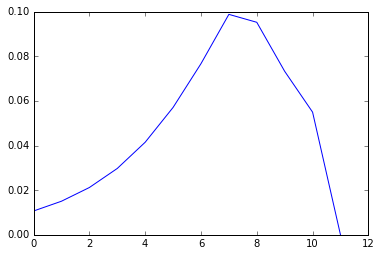

In [33]:
def binning_method(data, L):
    std_devs = []
    for n in range(L):
        print(len(data))
        data = np.asarray([(a + b) / 2 for a, b in zip(data[::2], data[1::2])])
        average_squared = np.mean(data)**2
        squared_average = np.mean(data**2)
        variance = squared_average - average_squared
        print(variance)
        print(np.sqrt(variance/len(data)))
        
        print("numpy_standard deviation", np.std(data))
        std_devs.append((n, np.sqrt(variance/len(data))))
    return std_devs

devs = binning_method(equilibrium_magnet, 12)
print(devs)
    

plt.plot([p[0] for p in devs], [p[1] for p in devs])
plt.show()


In [135]:
data = ising.autocorrelation(equilibrium_magnet)
plt.plot(range(len(data)), data)
plt.show()
correlation_time = np.trapz(normalize[:500])
print(correlation_time)

plt.plot(range(250), normalize[:250])
plt.show()

plt.plot(range(250), normalize[:250])
plt.yscale("log")
plt.show()

KeyboardInterrupt: 

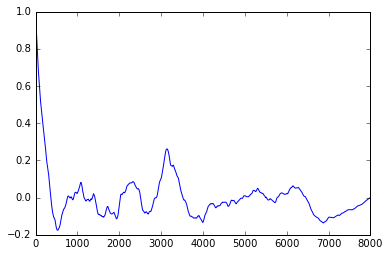

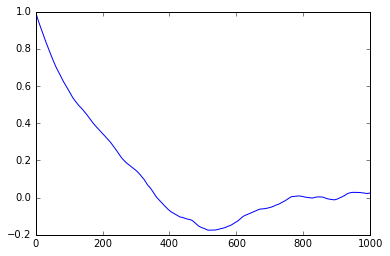

137.14516594


In [137]:
acfunc = ising.numpy_autocorrelation(equilibrium_magnet)
plt.plot(range(len(acfunc)), acfunc)
plt.show()

plt.plot(range(1000), acfunc[:1000])
plt.show()
correlation_time = np.trapz(acfunc[:500])
print(correlation_time)

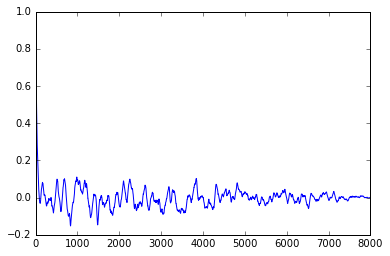

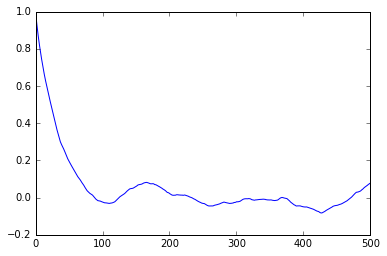

25.8322323616


In [139]:
acfunc = ising.numpy_autocorrelation(equilibrium_energy)
plt.plot(range(len(acfunc)), acfunc)
plt.show()

plt.plot(range(500), acfunc[:500])
plt.show()
correlation_time = np.trapz(acfunc[:500])
print(correlation_time)

In [145]:
magnet_samples = []
energy_samples = []

for t in np.arange(0, 4000, np.ceil(correlation_time)):
    magnet_samples.append(equilibrium_magnet[t])
    energy_samples.append(equilibrium_energy[t])
    
magnet_samples = np.asarray(magnet_samples)
energy_samples = np.asarray(energy_samples)
    
print("absolute magnetization per spin", np.mean(np.absolute(magnet_samples)), np.std(np.absolute(magnet_samples)))
print("magnetization per spin", np.mean(magnet_samples), np.std(magnet_samples))
print("energy per spin", np.mean(energy_samples), np.std(energy_samples))
print("magnetization squared", np.mean(magnet_samples**2), np.std(magnet_samples**2))
    

absolute magnetization per spin 0.657467532468 0.273195524122
magnetization per spin 0.313311688312 0.639323968436
energy per spin -3.10227272727 0.563077723785
magnetization squared 0.506899350649 0.324549488602


/Users/Teun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Teun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [240]:
def calculate_specific_heat(data, temperature):
    energy_average_squared = np.mean(data)**2
    energy_squared_average = np.mean(data**2)
    specific_heat = (1/temperature)**2 * (energy_squared_average- energy_average_squared)
    return specific_heat

def bootstrap_specific_heat(data, no_of_resamples, temperature):
    specific_heat = np.empty(no_of_resamples)
    for k in range(no_of_resamples):
        random_picks = np.random.choice(data, len(data))
        specific_heat.put(k, calculate_specific_heat(random_picks, temperature))
    
    specific_heat = np.asarray(specific_heat)
    standard_dev = np.sqrt(np.mean(specific_heat**2) - np.mean(specific_heat)**2)
    return standard_dev
        
        
        

In [241]:
def temperature_range(lower, upper, step):
    """Calculate energy and magnetization over a range of temperatures."""
    energy = []
    energy_error = []
    
    magnetization = []
    magnetization_error = []
    
    specific_heat = []
    specific_heat_error = []
    
    correlation_times = []
    
    for temperature in np.arange(lower, upper, step):
        print("Current temperature is: {0}".format(temperature))

        ising = metropolis_ising.MetropolisIsing(lattice_size_L = 10, 
                                                       bond_energy_J = 1, 
                                                       temperature_T = temperature,
                                                       initial_temperature = "lo", 
                                                       sweeps = 10000)
        
        ising.metropolis()
        equilibrium = 2000
        
        plt.title("Magnetization")
        plt.plot(range(len(ising.magnet_history)), ising.magnet_history)
        plt.show()
        
        plt.title("Internal Energy")
        plt.plot(range(len(ising.energy_history)), ising.energy_history)
        plt.show()
        
        energy_history = ising.energy_history[2000:] / ising.no_of_sites
        magnet_history = ising.magnet_history[2000:] / ising.no_of_sites
        acf = ising.numpy_autocorrelation(magnet_history)

        if np.isnan(acf).any():
            correlation_time = -1
        else:
            correlation_time = np.trapz(acf[:500])

        if correlation_time <= 0:
            correlation_time = 20

        c = calculate_specific_heat(energy_history, temperature)
        print("Specific heat", c)
        specific_heat.append((temperature, c))
        specific_heat_error.append((temperature, bootstrap_specific_heat(energy_history, 100, temperature)))
        
        magnet_samples = []
        energy_samples = []

        # Sample every two correlation times.
        for t in range(0, len(energy_history), 2 * math.ceil(correlation_time)):
            magnet_samples.append(magnet_history[t])
            energy_samples.append(energy_history[t])

        energy.append((temperature, np.mean(energy_samples)))
        energy_error.append((temperature, np.std(energy_samples)))

        magnetization.append((temperature, np.mean(np.absolute(magnet_samples))))
        magnetization_error.append((temperature, np.std(np.absolute(magnet_samples))))

        correlation_times.append((temperature, correlation_time))
    
    return energy, energy_error, magnetization, magnetization_error, specific_heat, specific_heat_error, correlation_times

Current temperature is: 0.2


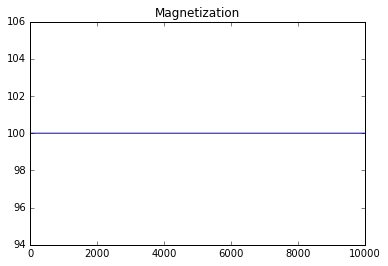

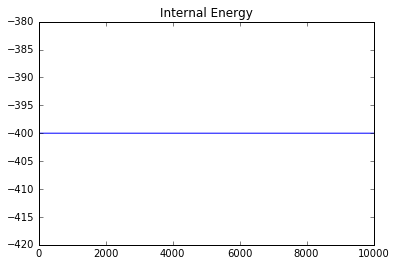

/Users/Teun/Dropbox/University/bachelor-project/code/metropolis_ising.py:160: RuntimeWarning: invalid value encountered in true_divide
  


Specific heat 0.0
Current temperature is: 0.4


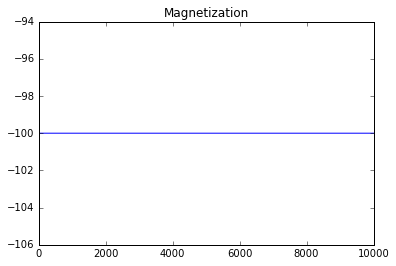

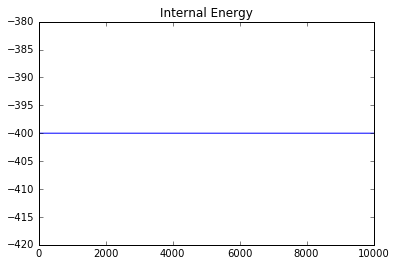

Specific heat 0.0
Current temperature is: 0.6000000000000001


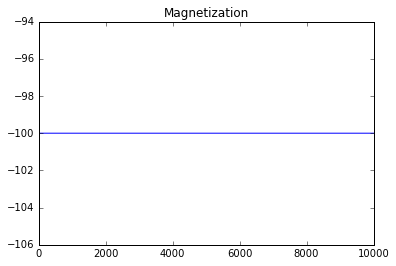

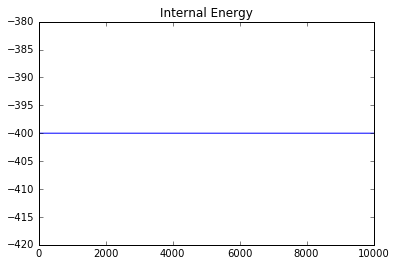

Specific heat 0.0
Current temperature is: 0.8


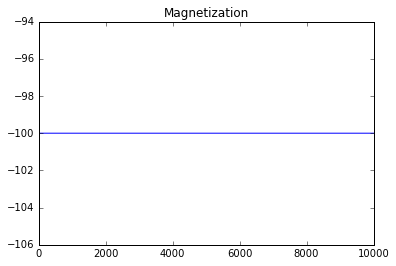

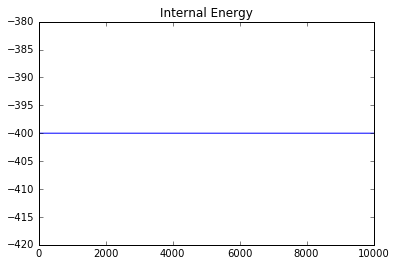

Specific heat 0.0
Current temperature is: 1.0


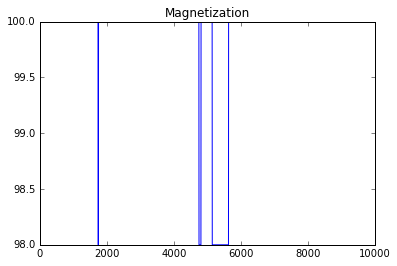

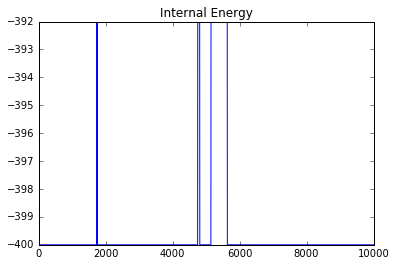

Specific heat 0.000409059899999
Current temperature is: 1.2


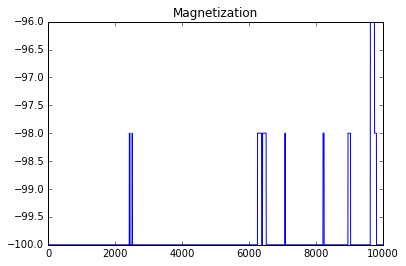

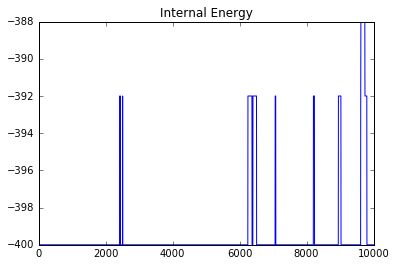

Specific heat 0.000373738819444
Current temperature is: 1.4000000000000001


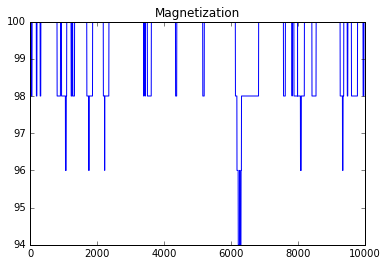

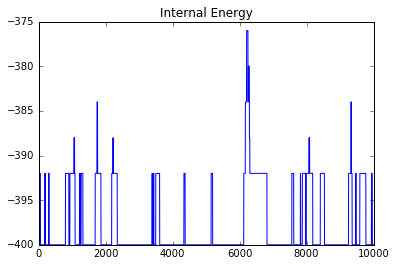

Specific heat 0.000855720612244
Current temperature is: 1.6


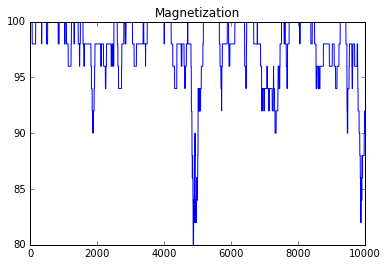

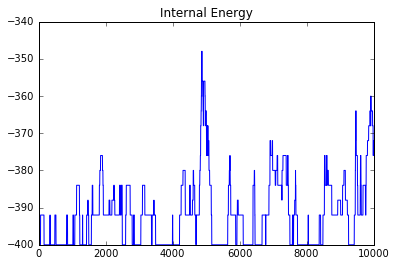

Specific heat 0.00369147241211
Current temperature is: 1.8


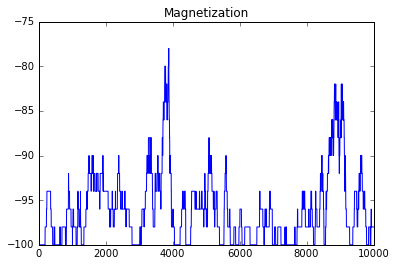

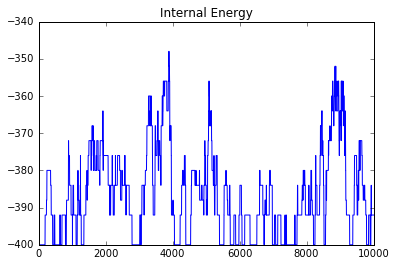

Specific heat 0.00459239814043
Current temperature is: 2.0


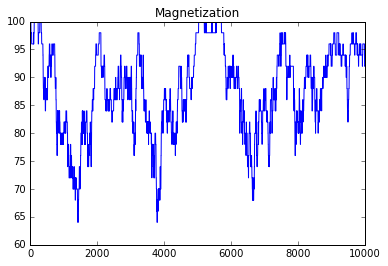

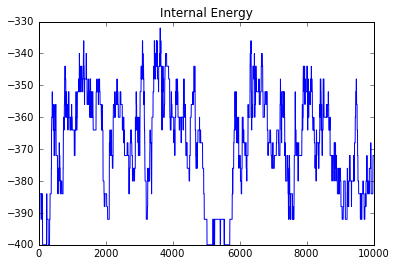

Specific heat 0.00598066619375
Current temperature is: 2.2


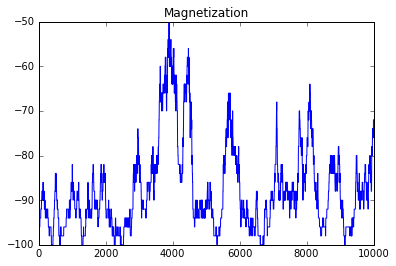

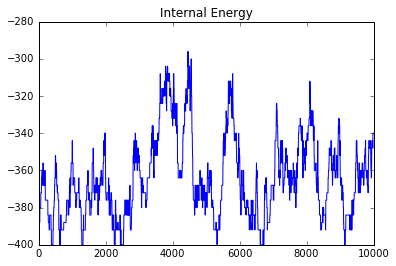

Specific heat 0.010589297061
Current temperature is: 2.4000000000000004


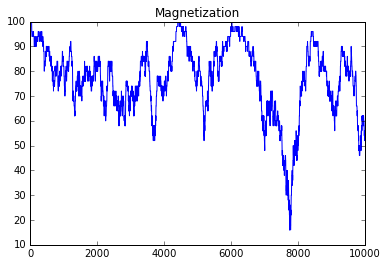

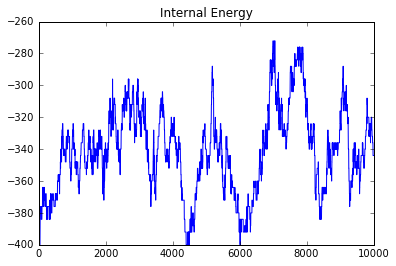

Specific heat 0.0130200951215
Current temperature is: 2.6000000000000005


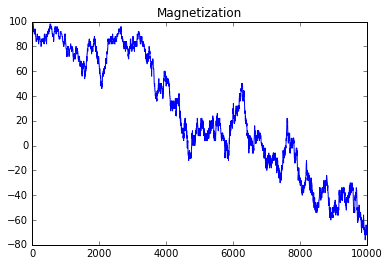

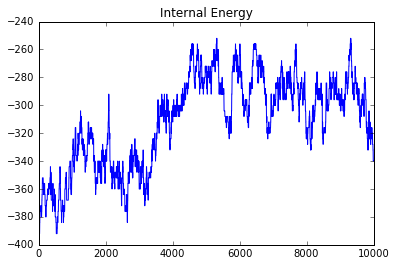

Specific heat 0.0110304113868
Current temperature is: 2.8000000000000003


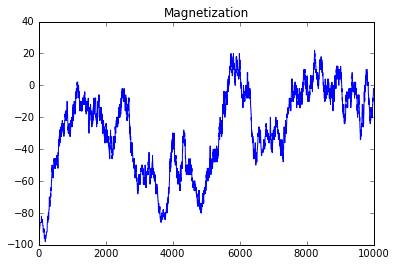

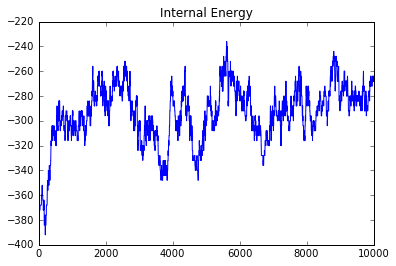

Specific heat 0.00568674510204
Current temperature is: 3.0000000000000004


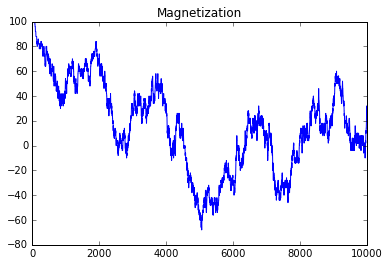

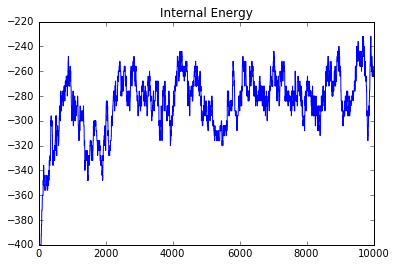

Specific heat 0.00322368048611
Current temperature is: 3.2


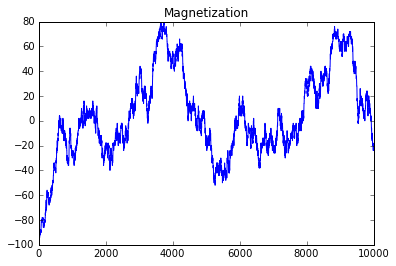

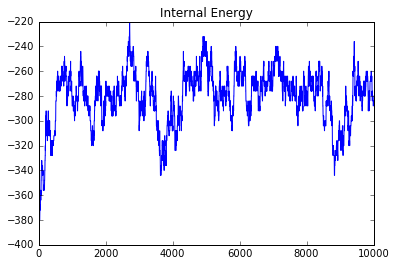

Specific heat 0.00401147040771
Current temperature is: 3.4000000000000004


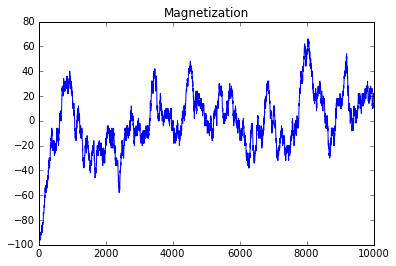

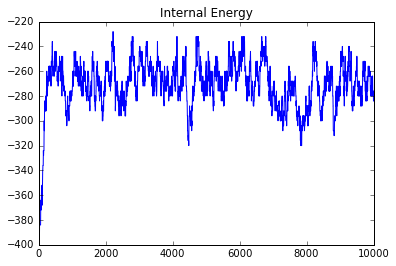

Specific heat 0.00238597745459
Current temperature is: 3.6000000000000005


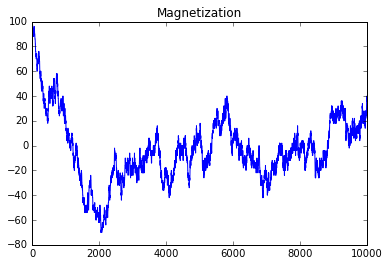

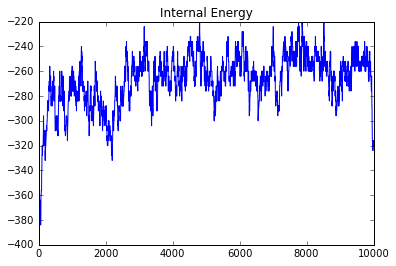

Specific heat 0.00231537036844
Current temperature is: 3.8000000000000003


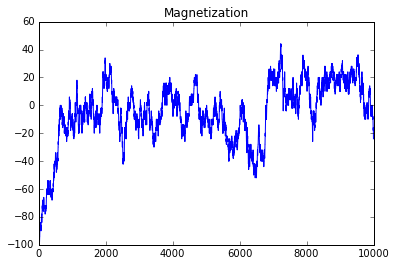

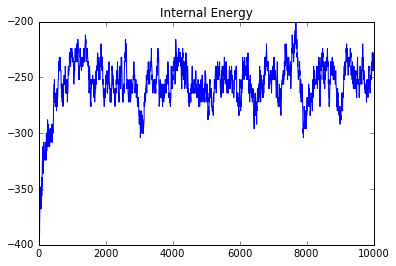

Specific heat 0.00166725982687
Current temperature is: 4.0


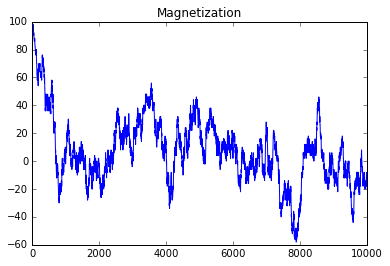

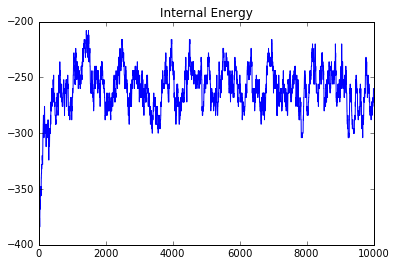

Specific heat 0.001753079975
Current temperature is: 4.2


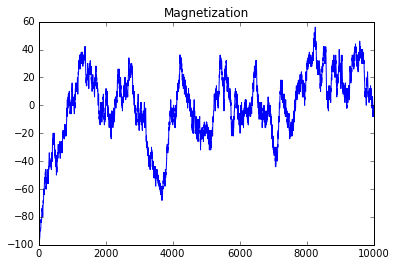

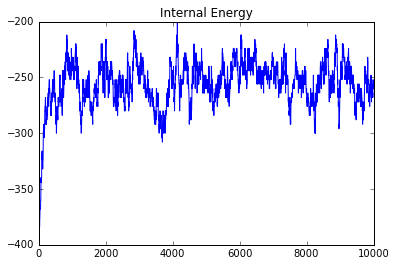

Specific heat 0.00156561812783
Current temperature is: 4.4


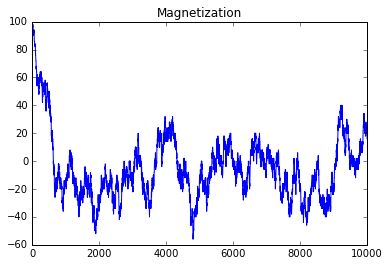

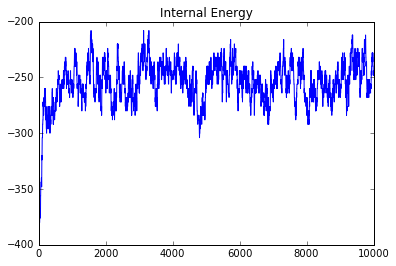

Specific heat 0.00126189172392
Current temperature is: 4.6000000000000005


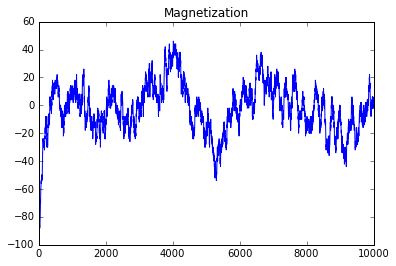

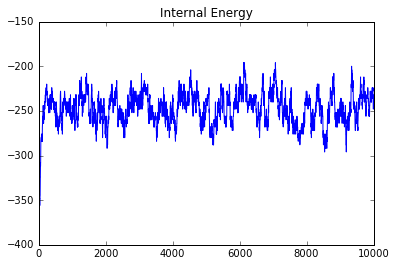

Specific heat 0.00136546493266
Current temperature is: 4.800000000000001


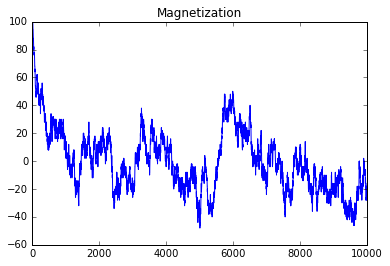

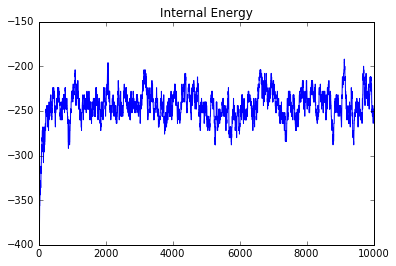

Specific heat 0.00103218975586
Current temperature is: 5.000000000000001


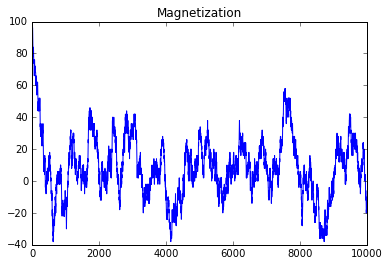

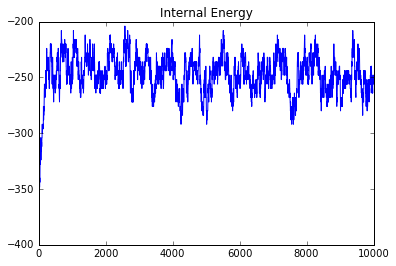

Specific heat 0.000930230375
Current temperature is: 5.2


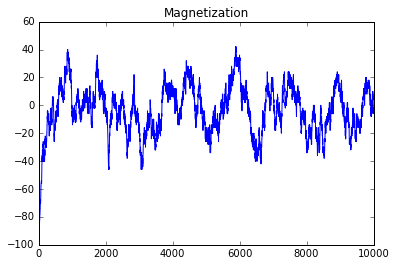

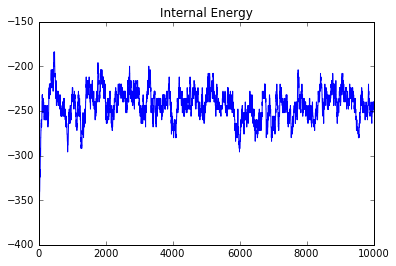

Specific heat 0.00084528701091
Current temperature is: 5.4


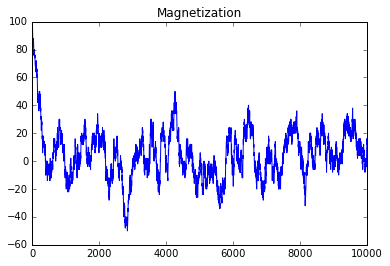

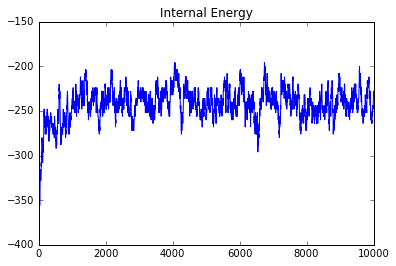

Specific heat 0.000682539155521
Current temperature is: 5.6000000000000005


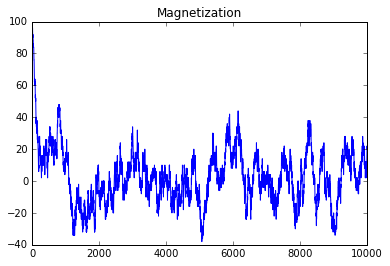

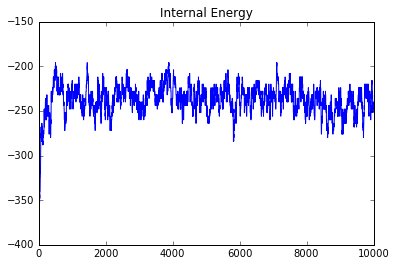

Specific heat 0.000606287288744
Current temperature is: 5.800000000000001


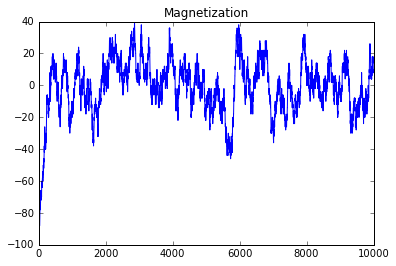

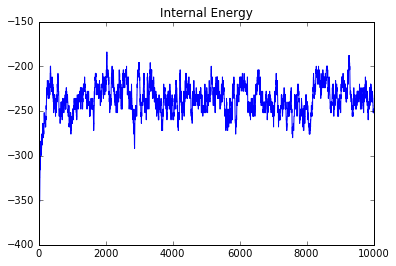

Specific heat 0.000730564756243


In [242]:
energy, energy_error, magnetization, magnetization_error, specific_heat, specific_heat_error, correlation_times = temperature_range(0.2, 6, 0.2)


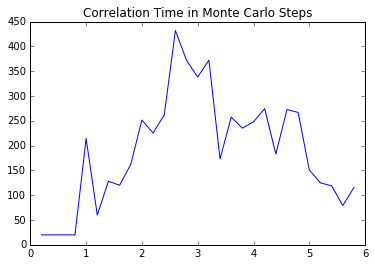

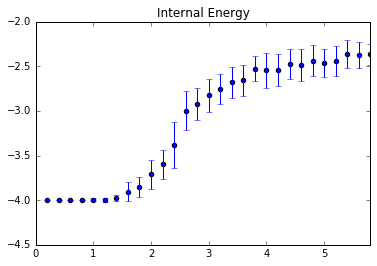

/Users/Teun/Dropbox/University/bachelor-project/code/metropolis_ising.py:119: RuntimeWarning: invalid value encountered in double_scalars
  if np.isnan(M):


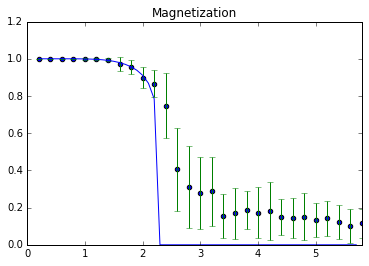

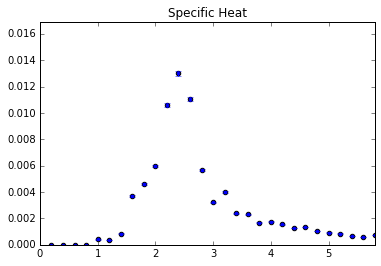

In [255]:
plt.title("Correlation Time in Monte Carlo Steps")
plt.plot([c[0] for c in correlation_times], [c[1] for c in correlation_times])
plt.show()

plt.title("Internal Energy")
plt.xlim(0, energy[len(energy) - 1][0])
plt.scatter([e[0] for e in energy], [e[1] for e in energy])
plt.errorbar([ee[0] for ee in energy_error], [e[1] for e in energy], [ee[1] for ee in energy_error], linestyle='None')
plt.show()

plt.title("Magnetization")
exact_magnet = [ising.exact_magnetization(T) for T in np.arange(magnetization[0][0], magnetization[len(magnetization) - 1][0], 0.1)]
plt.plot(np.arange(magnetization[0][0], magnetization[len(magnetization) - 1][0], 0.1), exact_magnet)

plt.xlim(0, magnetization[len(magnetization) - 1][0])
plt.ylim(0 ,1.2)
plt.scatter([m[0] for m in magnetization], [m[1] for m in magnetization])
plt.errorbar([m[0] for m in magnetization], [m[1] for m in magnetization], [me[1] for me in magnetization_error], linestyle='None')
plt.show()

plt.title("Specific Heat")
plt.xlim(0, specific_heat[len(specific_heat) - 1][0])
plt.ylim(0, 1.3 * max(specific_heat, key=lambda x: x[1])[1])
plt.scatter([c[0] for c in specific_heat], [c[1] for c in specific_heat])
plt.errorbar([c[0] for c in specific_heat], [c[1] for c in specific_heat], [ce[1] for ce in specific_heat_error], linestyle='None')
plt.show()

2.23519885723


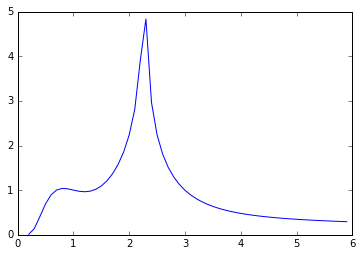

In [273]:
from scipy.special import ellipk, ellipe

def exact_specific_heat(temperature):
    J = 1
    hyp_arg = (2 / temperature) * J
    k = 2 * np.sinh(hyp_arg) / np.cosh(hyp_arg)**2
    kprime = np.sqrt(1 - k**2)
    term_one = (J / temperature * (1 / np.tanh(hyp_arg)))**2 * (np.pi / 2)
    term_two = 2*ellipk(k) - 2*ellipe(k) - (1 - kprime) * ((np.pi / 2) + kprime * ellipk(k))
    c = term_one * term_two
    return c

spec_heat = []
print(exact_specific_heat(2))
for t in np.arange(0.2, 6, 0.1):
#     print(exact_specific_heat(t))
    spec_heat.append(exact_specific_heat(t))

plt.plot(np.arange(0.2, 6, 0.1), spec_heat)
plt.show()



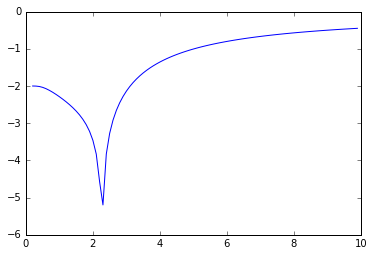

In [167]:
importlib.reload(metropolis_ising)
exact_energy = [ising.exact_energy(T) for T in np.arange(0.2, 10, 0.1)]
plt.plot(np.arange(0.2, 10, 0.1), exact_energy)

# plt.xlim(0, 10)
# plt.scatter(np.arange(0.2, 10.0, 0.2), temp_dep_energy)
# plt.errorbar(np.arange(0.2, 10.0, 0.2), temp_dep_energy, temp_dep_energy_error, linestyle='None')
plt.show()